# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

In [8]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas import DataFrame

In [15]:
df = pd.read_csv('Sales Data.csv')
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


#Lets clean the data a bit

# del df['Unnamed: 0']

In [16]:
df.isna().sum() #shows that there are no null values

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

In [17]:
m_sales=df.groupby('Month')['Sales'].sum()
m_sales

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

<Axes: title={'center': 'Best Month for Sales'}, xlabel='Month'>

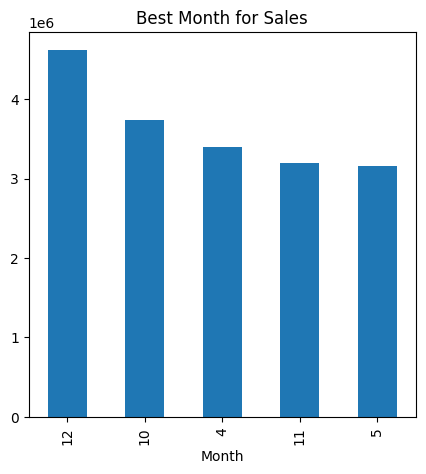

In [18]:
m_sales=df.groupby('Month')['Sales'].sum().nlargest(5).plot.bar(title='Best Month for Sales',figsize=(5,5))
m_sales

** It clearly hows that December month with highest sales value of 4613443

Lets see 'Which city sold the most'?



In [19]:
city_sales=df.groupby('City')['Sales'].sum().nlargest(5)
city_sales

City
 San Francisco    8262203.91
 Los Angeles      5452570.80
 New York City    4664317.43
 Boston           3661642.01
 Atlanta          2795498.58
Name: Sales, dtype: float64

[Text(0.5, 1.0, 'Top 5 cities which sold the most')]

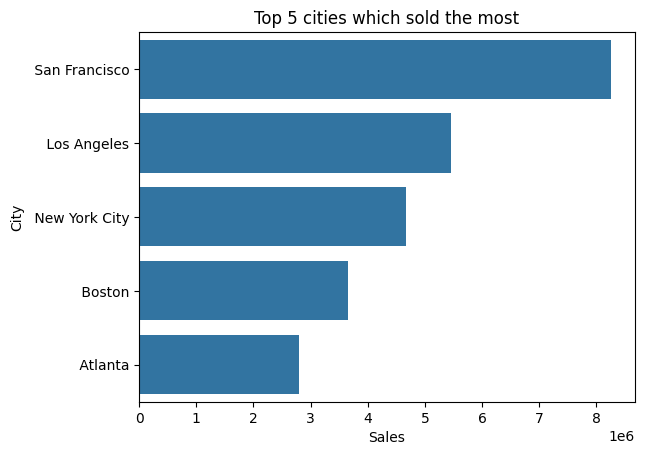

In [20]:
sns.barplot(y=city_sales.index,x=city_sales).set(title='Top 5 cities which sold the most' )

<Axes: xlabel='Hour'>

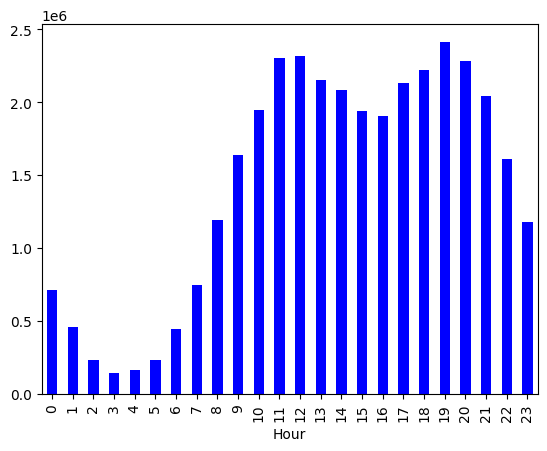

In [22]:
df.groupby('Hour')['Sales'].sum().plot.bar(color='blue')

This shows that the sales are high between 8 am to 11 pm and would the appropriate time to play ads

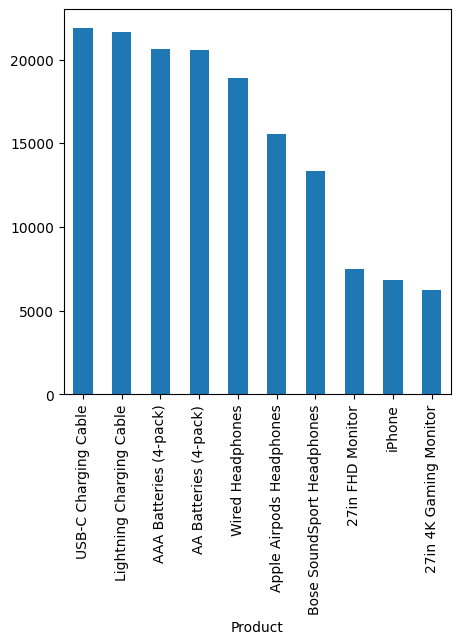

In [23]:
most_sold=df['Product'].value_counts().nlargest(10).plot.bar(figsize=(5,5))

By the bar chart we can see that sales with products related to mobile & laptop is quite high. Specially charging cables and Headphones